# PIE - Using multiple features for classification

In this notebook, we will train different types of classifiers on the features we lately found out and visualized.

In [1]:
from pie_utils import *
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#Classifiers and utils
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder, scale
from keras.utils import to_categorical

from sklearn import svm

from sklearn.naive_bayes import GaussianNB

from sklearn.neural_network import MLPClassifier

from keras.models import Sequential
from keras.layers import Dense, Activation
import keras.metrics as metrics
import keras.losses as losses
import keras.optimizers as optimizers

#from xgboost import XGBClassifier

/home/lucas/anaconda3/envs/sdd/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#The datapath depends on the configuration of your own folder PIE. Check your data path out !
datapath = './' #directory where audio files are
#datapath = "../../data/" 

train = pd.read_csv(osp.join(datapath,"data-PIE-Sonar.csv"))

## Data preprocessing & features gathering

### Gathering raw data

In [3]:
# Let's try with MFCC features
#the following dict is convenient to use for the "apply" that come after that)
data_path = osp.join('./audio-PIE-Sonar/','audio_train/') # To be changed according to YOUR data directory
kwargs = {'data_directory_path': data_path,  
          'n_mfcc': 20,
          'trim': True}

X = train.apply(lambda x : parser_mfcc(x, **kwargs),axis=1)
# => We may want to use another feature, just change the parser used in the function above

In [4]:
Y = train['label']
list_labels = train.label.unique()
list_labels.sort()

In [5]:
#Saving heavy data to gain time
import pickle
import os.path
fname = 'store_20mfcc_trimmed.pckl'

if os.path.isfile(fname):
    f = open(fname, 'rb')
    X = pickle.load(f)
else:
    f = open(fname, 'wb')
    pickle.dump(X, f)
f.close

<function BufferedWriter.close>

### Preprocessing

In [6]:
#Scaling X
X0 = X[0].tolist() #just extracting X as an array
X_scaled = scale(X0)

#One hot encoding Y
label_encoder = LabelEncoder()
Y_cat = label_encoder.fit_transform(Y)

In [29]:
print(X_scaled.shape)

(9473, 20)


### Extracting training and test sets

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y_cat, stratify=Y_cat, test_size=0.33)

#Useful for NN
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

## Training a bayesian model

### Training and predicting

In [8]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB(priors=None)

In [9]:
prediction = gnb.predict(X_test)

### Assessing accuracy

In [10]:
print("Accuracy: ")
print(accuracy_score(y_test, prediction))
print("\n\n")
print("Confusion matrix: ")
print(confusion_matrix(y_test, prediction))
print("\n\n")
print(classification_report(y_test, prediction, target_names=list_labels))

Accuracy: 
0.3795970578829549



Confusion matrix: 
[[44  0  0 ...  1  2  1]
 [ 0 75  2 ...  0  0  1]
 [ 0  1 28 ...  1  1  0]
 ...
 [ 3  4  4 ... 16  3  0]
 [ 2  2  0 ...  1 50  0]
 [ 1  2  0 ...  1  1 18]]



                       precision    recall  f1-score   support

      Acoustic_guitar       0.47      0.44      0.46        99
             Applause       0.56      0.76      0.64        99
                 Bark       0.36      0.35      0.36        79
            Bass_drum       0.45      0.76      0.57        99
Burping_or_eructation       0.70      0.61      0.65        69
                  Bus       0.22      0.11      0.15        36
                Cello       0.52      0.47      0.50        99
                Chime       0.27      0.18      0.22        38
             Clarinet       0.63      0.61      0.62        99
    Computer_keyboard       0.19      0.23      0.21        39
                Cough       0.38      0.28      0.32        80
              Cowbell       0.73

## Training a SVM

### Training and predicting

In [11]:
#svc = svm.SVC(kernel='linear', gamma=1e-3) # Seem not to work
svc = svm.SVC(kernel='rbf', gamma=11e-3) #gamma here is tunned at 1e-3 resolution
svc.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.011, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [1]:
prediction = svc.predict(X_test)

NameError: name 'svc' is not defined

### Assessing accuracy

In [13]:
print("Accuracy: ")
print(accuracy_score(y_test, prediction))
print("\n\n")
print("Confusion matrix: ")
print(confusion_matrix(y_test, prediction))
print("\n\n")
print(classification_report(y_test, prediction, target_names=list_labels))

Accuracy: 
0.4723377038695235



Confusion matrix: 
[[49  0  1 ...  0  1  2]
 [ 0 82  1 ...  0  0  2]
 [ 0  7 46 ...  1  0  4]
 ...
 [ 3  3  4 ... 27  2  2]
 [ 0  1  0 ...  1 72  0]
 [ 2  3  2 ...  0  0 49]]



                       precision    recall  f1-score   support

      Acoustic_guitar       0.54      0.49      0.52        99
             Applause       0.55      0.83      0.66        99
                 Bark       0.40      0.58      0.48        79
            Bass_drum       0.55      0.84      0.66        99
Burping_or_eructation       0.75      0.70      0.72        69
                  Bus       0.00      0.00      0.00        36
                Cello       0.58      0.66      0.62        99
                Chime       0.67      0.16      0.26        38
             Clarinet       0.69      0.67      0.68        99
    Computer_keyboard       0.00      0.00      0.00        39
                Cough       0.36      0.33      0.34        80
              Cowbell       0.90

/home/lucas/anaconda3/envs/sdd/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Training a neural network

### Training and predicting

In [22]:
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=np.shape(X_train)[1]))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=41, activation='softmax'))


def top3_acc(ytrue, ypred):
    return metrics.top_k_categorical_accuracy(ytrue, ypred, k=3)

model.compile(loss=losses.categorical_crossentropy,
              optimizer=optimizers.Adam(),
              metrics=[metrics.categorical_accuracy, top3_acc])

In [23]:
# Here the split is done in the fit method, so we can follow the validation loss/acc in real time too
history = model.fit(X_train, y_train_ohe, epochs=100, batch_size=200, validation_split=0.2)

Train on 5076 samples, validate on 1270 samples
Epoch 1/100
5076/5076 [==============================] - 4s 734us/step - loss: 3.5271 - categorical_accuracy: 0.0967 - top3_acc: 0.2179 - val_loss: 3.3051 - val_categorical_accuracy: 0.1606 - val_top3_acc: 0.3283
Epoch 2/100
5076/5076 [==============================] - 1s 194us/step - loss: 3.0069 - categorical_accuracy: 0.2392 - top3_acc: 0.4171 - val_loss: 2.8272 - val_categorical_accuracy: 0.2732 - val_top3_acc: 0.4787
Epoch 3/100
5076/5076 [==============================] - 1s 217us/step - loss: 2.5915 - categorical_accuracy: 0.3182 - top3_acc: 0.5258 - val_loss: 2.5680 - val_categorical_accuracy: 0.3197 - val_top3_acc: 0.5283
Epoch 4/100
5076/5076 [==============================] - 1s 206us/step - loss: 2.3461 - categorical_accuracy: 0.3690 - top3_acc: 0.5839 - val_loss: 2.4111 - val_categorical_accuracy: 0.3465 - val_top3_acc: 0.5677
Epoch 5/100
5076/5076 [==============================] - 1s 245us/step - loss: 2.1920 - categorical_

5076/5076 [==============================] - 1s 221us/step - loss: 0.2536 - categorical_accuracy: 0.9340 - top3_acc: 0.9864 - val_loss: 3.3037 - val_categorical_accuracy: 0.4945 - val_top3_acc: 0.6693
Epoch 78/100
5076/5076 [==============================] - 1s 189us/step - loss: 0.2375 - categorical_accuracy: 0.9377 - top3_acc: 0.9864 - val_loss: 3.4298 - val_categorical_accuracy: 0.4937 - val_top3_acc: 0.6535
Epoch 79/100
5076/5076 [==============================] - 1s 212us/step - loss: 0.2378 - categorical_accuracy: 0.9354 - top3_acc: 0.9876 - val_loss: 3.3999 - val_categorical_accuracy: 0.4898 - val_top3_acc: 0.6567
Epoch 80/100
5076/5076 [==============================] - 1s 182us/step - loss: 0.2288 - categorical_accuracy: 0.9405 - top3_acc: 0.9890 - val_loss: 3.4247 - val_categorical_accuracy: 0.4866 - val_top3_acc: 0.6646
Epoch 81/100
5076/5076 [==============================] - 1s 173us/step - loss: 0.2079 - categorical_accuracy: 0.9427 - top3_acc: 0.9905 - val_loss: 3.4787 -

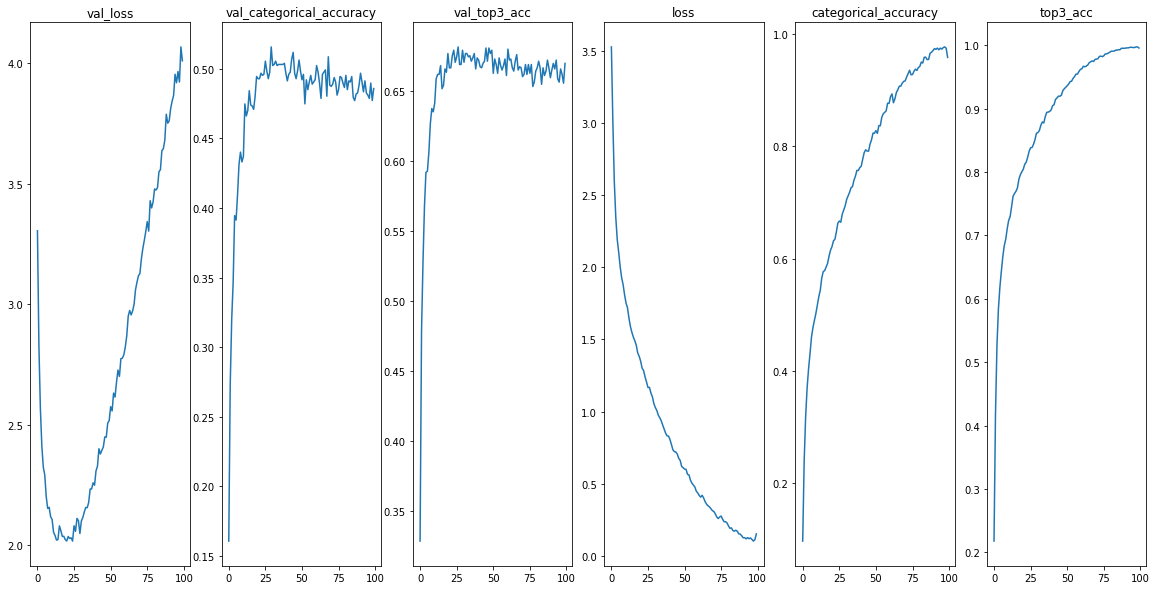

In [24]:
plt.figure(figsize=(20,10))

for i, (name, values) in enumerate(history.history.items()):
    plt.subplot(1, len(history.history.items()), i+1)
    plt.plot(values)
    plt.title(name)

### Assessing accuracy

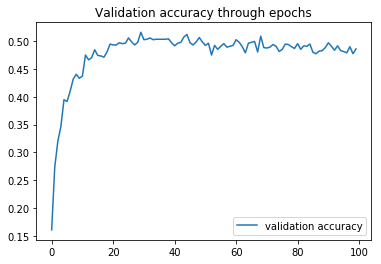

In [25]:
plt.figure()
plt.plot(history.history['val_categorical_accuracy'], label='validation accuracy')
plt.title("Validation accuracy through epochs")
plt.legend()

In [26]:
prediction = model.predict(X_test).argmax(axis=1)
print("Accuracy: ")
print(accuracy_score(y_test, prediction))
print("\n\n")
print("Confusion matrix: ")
print(confusion_matrix(y_test, prediction))
print("\n\n")
print(classification_report(y_test, prediction, target_names=list_labels))

Accuracy: 
0.4723377038695235



Confusion matrix: 
[[49  0  1 ...  0  1  2]
 [ 0 82  1 ...  0  0  2]
 [ 0  7 46 ...  1  0  4]
 ...
 [ 3  3  4 ... 27  2  2]
 [ 0  1  0 ...  1 72  0]
 [ 2  3  2 ...  0  0 49]]



                       precision    recall  f1-score   support

      Acoustic_guitar       0.54      0.49      0.52        99
             Applause       0.55      0.83      0.66        99
                 Bark       0.40      0.58      0.48        79
            Bass_drum       0.55      0.84      0.66        99
Burping_or_eructation       0.75      0.70      0.72        69
                  Bus       0.00      0.00      0.00        36
                Cello       0.58      0.66      0.62        99
                Chime       0.67      0.16      0.26        38
             Clarinet       0.69      0.67      0.68        99
    Computer_keyboard       0.00      0.00      0.00        39
                Cough       0.36      0.33      0.34        80
              Cowbell       0.90

/home/lucas/anaconda3/envs/sdd/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Training a decision tree

### Training and predicting

In [ ]:
model_xgbc = XGBClassifier()
model_xgbc.fit(X_train, y_train)

In [ ]:
prediction = model_xgbc.predict(X_test)

### Assessing accuracy

In [ ]:
print("Accuracy: ")
print(accuracy_score(y_test, prediction))
print("\n\n")
print("Confusion matrix: ")
print(confusion_matrix(y_test, prediction))
print("\n\n")
print(classification_report(y_test, prediction, target_names=list_labels))

In [ ]:
plt.bar(range(len(model_xgbc.feature_importances_)), model_xgbc.feature_importances_)
plt.show()

In [ ]:
from xgboost import plot_importance

plot_importance(model_xgbc)
plt.show()